<a href="https://colab.research.google.com/github/NicolasAmUs/CNN-Mnist_perceptron/blob/main/CNN_numeross_final_h5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from collections import deque
import numpy as np
import tensorflow.keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import backend as K
from keras.models import load_model
import matplotlib.pyplot as plt


In [ ]:
#definir parametros para entrenamiento de la red neuronal

batch_size = 100
num_clases = 10
epochs = 7
filas,columnas = 28,28
class_names = ['cero','uno','dos','tres','cuatro','cinco','seis','siete','ocho','nueve']


In [ ]:
#entrenamiento tomando como base de datos MNIST
(xt,yt),(xtest,ytest) = mnist.load_data()

#redmensionar el vector a 28x28
xt = xt.reshape(xt.shape[0], filas, columnas)
xtest = xtest.reshape(xtest.shape[0],filas,columnas)
input_shape = (28, 28, 1)


xt =xt.astype('float32')
xtest = xtest.astype('float32')

xt = xt/255
xtest = xtest/255

yt = tensorflow.keras.utils.to_categorical(yt, num_clases)
ytest = tensorflow.keras.utils.to_categorical(ytest, num_clases)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#Definimos la red neuronal  - perceptron multicapa
modelo = Sequential()
modelo.add(Flatten(input_shape=(28,28,1)))
modelo.add(Dense(68,activation='relu'))
modelo.add(Dense(20,activation ='relu'))
modelo.add(Dense(num_clases, activation='Softmax'))
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 68)                53380     
                                                                 
 dense_1 (Dense)             (None, 20)                1380      
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 54,970
Trainable params: 54,970
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compilar el modelo con las capas anteriomente especificadas
modelo.compile(loss=tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(), metrics=['categorical_accuracy'])

In [ ]:
#verificacion epoca a epoca de la precision y error del entrenamiento.
history=modelo.fit(xt,yt,batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(xtest,ytest))

Epoch 1/7
600/600 [==============================] - 8s 4ms/step - loss: 0.3819 - categorical_accuracy: 0.8920 - val_loss: 0.1926 - val_categorical_accuracy: 0.9443
Epoch 2/7
600/600 [==============================] - 3s 5ms/step - loss: 0.1707 - categorical_accuracy: 0.9501 - val_loss: 0.1456 - val_categorical_accuracy: 0.9571
Epoch 3/7
600/600 [==============================] - 2s 3ms/step - loss: 0.1282 - categorical_accuracy: 0.9618 - val_loss: 0.1200 - val_categorical_accuracy: 0.9634
Epoch 4/7
600/600 [==============================] - 2s 3ms/step - loss: 0.1027 - categorical_accuracy: 0.9698 - val_loss: 0.1069 - val_categorical_accuracy: 0.9687
Epoch 5/7
600/600 [==============================] - 2s 3ms/step - loss: 0.0846 - categorical_accuracy: 0.9754 - val_loss: 0.0977 - val_categorical_accuracy: 0.9704
Epoch 6/7
600/600 [==============================] - 2s 3ms/step - loss: 0.0727 - categorical_accuracy: 0.9780 - val_loss: 0.0940 - val_categorical_accuracy: 0.9717
Epoch 7/7


In [ ]:
#metrica de precision y perdida 
[test_loss, test_acc] = modelo.evaluate(xtest, ytest)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))


313/313 [==============================] - 1s 2ms/step - loss: 0.0972 - categorical_accuracy: 0.9702
Evaluation result on Test Data : Loss = 0.0972251445055008, accuracy = 0.9702000021934509


In [ ]:
#verificar las metricas que son validas para graficar 
history.history.keys() 

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

Text(0.5, 1.0, 'Accuracy Curves')

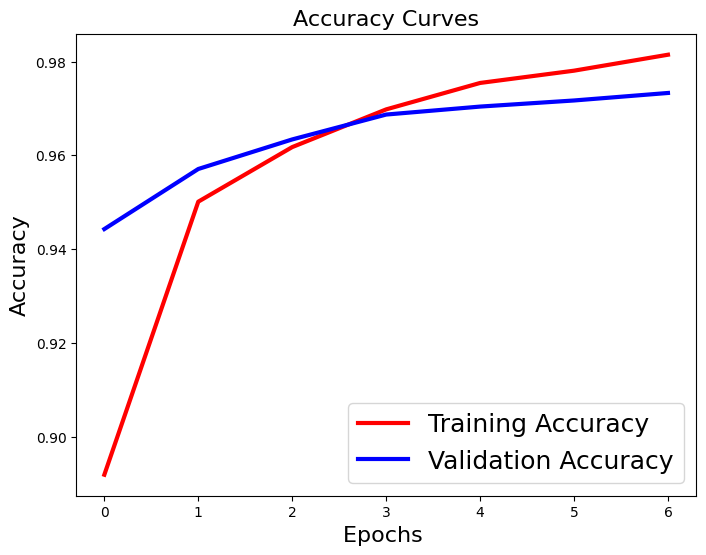

In [ ]:

#graficar graficas de precision categorica, validacion
plt.figure(figsize=[8,6]) 
plt.plot(history.history['categorical_accuracy'],'r',linewidth=3.0) 
plt.plot(history.history['val_categorical_accuracy'],'b',linewidth=3.0) 
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16) 
plt.title('Accuracy Curves',fontsize=16)

313/313 [==============================] - 1s 2ms/step


Text(0.5, 1.0, 'Ground Truth : 2')

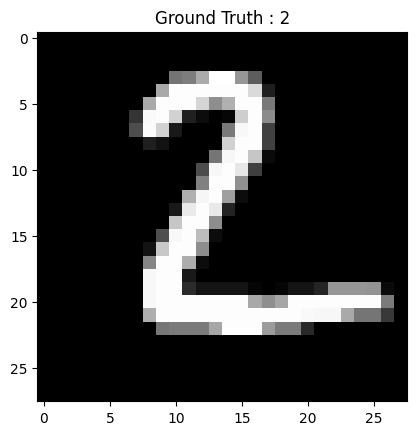

In [ ]:
predict_x=modelo.predict(xtest) 
classes_x=np.argmax(predict_x,axis=1)
 
# graficar la imagen con su respectiva prediccion
plt.imshow(xtest[1], cmap='gray')
plt.title("Ground Truth : {}".format(np.argmax(ytest[1])))

In [ ]:
# verificar los pesos obtenidos para un numero de prueba 
modelo.predict(xtest[[0],:])

1/1 [==============================] - 0s 25ms/step


array([[3.0892741e-07, 9.9255794e-07, 3.3067632e-04, 2.4964998e-04,
        2.1462971e-09, 1.8346308e-06, 2.1735028e-13, 9.9936551e-01,
        5.2486814e-07, 5.0542552e-05]], dtype=float32)

In [ ]:
#guardar el modelo como h5, para integracion con otro sistema
modelo.save('CNN_numeros.h5')